In [79]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [80]:
customer=pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 1 - Retail Case Study\Customer.csv")
prod_info=pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction=pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 1 - Retail Case Study\Transactions.csv")

In [81]:
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [82]:
prod_info.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [83]:
#renaming "prod_sub_cat_code" column in prod_info table to make it similar to transaction table.
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"}, inplace=True)

In [84]:
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [85]:
#merge transaction and product info table to create a new table "prod_concat"
prod_concat= pd.merge(left=transaction, right=prod_info, on=["prod_subcat_code","prod_cat_code"], how="left")

In [86]:
#merge "prod_concat" and "customer" table and create the final table "customer_final".
customer_final=pd.merge(left=prod_concat,right=customer, right_on="customer_Id", left_on="cust_id", how="left")

In [87]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [88]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [89]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [90]:
customer_final['DOB'].head(10)

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
5   1982-10-09
6   1981-05-29
7   1971-04-21
8   1971-11-04
9   1979-11-27
Name: DOB, dtype: datetime64[ns]

In [91]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

C:\Users\Keshav\AppData\Local\Temp\ipykernel_5684\884999959.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])


In [92]:
customer_final["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

In [93]:
customer_final.duplicated().sum()

13

In [94]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [95]:
customer_final.duplicated().sum()

0

2(a) Get the column names and their corresponding data types

In [96]:
column_info = customer_final.dtypes
print(column_info)

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object


 b. Top/Bottom 10 observations

In [97]:
# top 10 observations
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [98]:
#bottom 10 observations
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [99]:
customer_final.describe().drop(['count','mean','std'])

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,DOB,city_code
min,3.268991e+06,266783.00,2011-01-25 00:00:00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,266783.00,1970-01-02 00:00:00,1.0
25%,2.493315e+10,268935.00,2011-11-02 18:00:00,3.0,2.0,1.0,312.0,98.2800,762.450,268935.00,1975-09-25 12:00:00,3.0
50%,5.009188e+10,270980.50,2012-08-11 00:00:00,5.0,4.0,3.0,710.0,199.0800,1756.950,270980.50,1981-06-16 00:00:00,5.0
75%,7.532632e+10,273114.25,2013-05-17 00:00:00,10.0,5.0,4.0,1109.0,365.7675,3570.255,273114.25,1987-06-05 06:00:00,8.0
max,9.998755e+10,275265.00,2014-02-28 00:00:00,12.0,6.0,5.0,1500.0,787.5000,8287.500,275265.00,1992-12-29 00:00:00,10.0


D.Frequency tables for all the categorical variables

In [100]:
customer_final.describe(include='object')

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


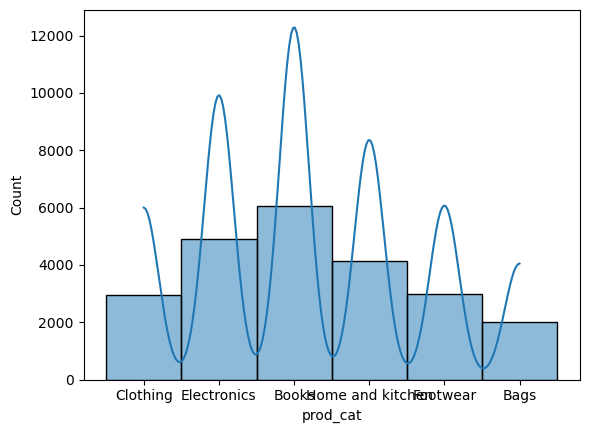

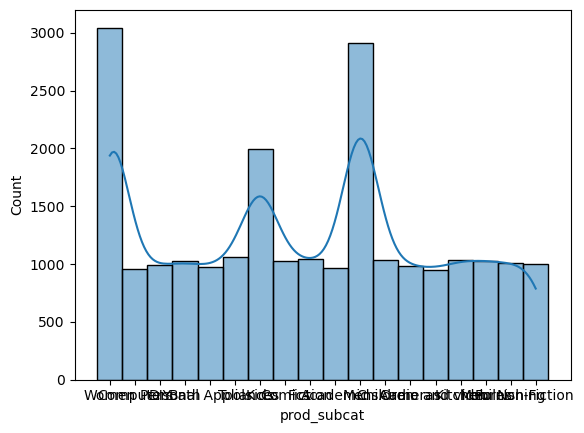

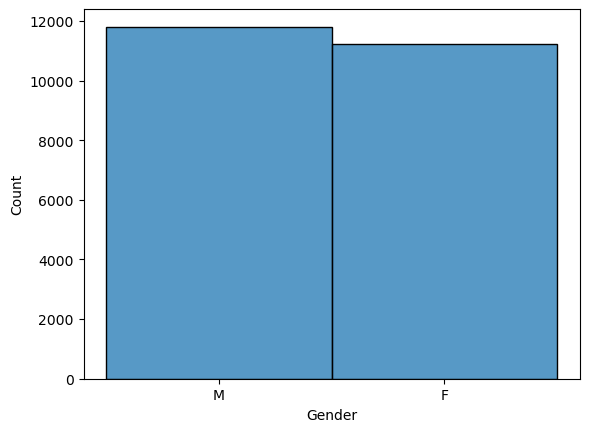

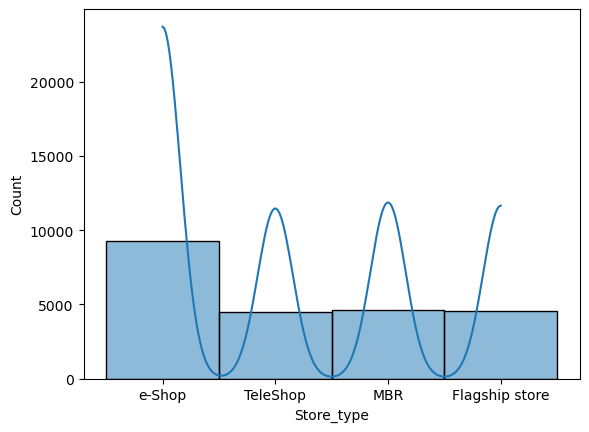

In [101]:
sns.histplot(customer_final.prod_cat, kde=True)
plt.show()
sns.histplot(customer_final.prod_subcat, kde=True)
plt.show()
sns.histplot(customer_final.Gender)
plt.show()
sns.histplot(customer_final.Store_type, kde=True)
plt.show()

3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [103]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [104]:
conti_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

Histogram of all continuous variables

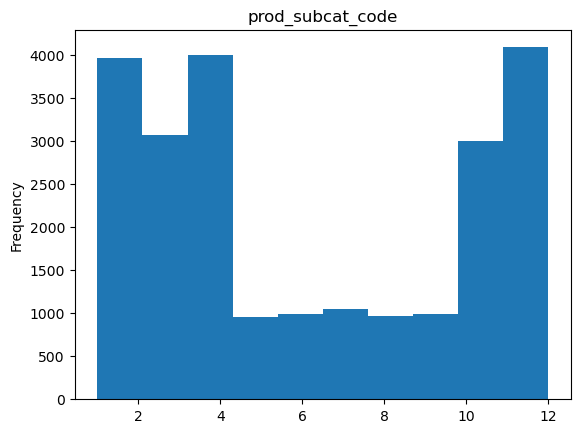

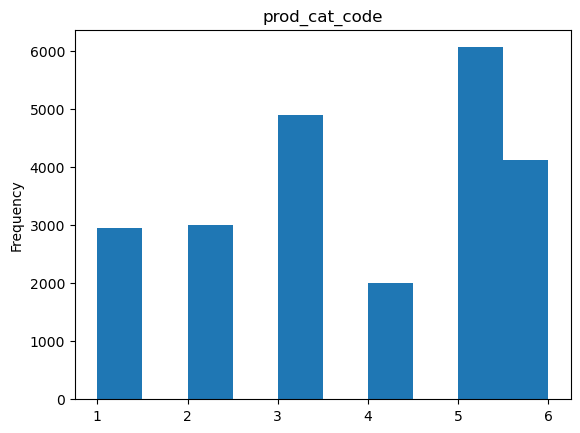

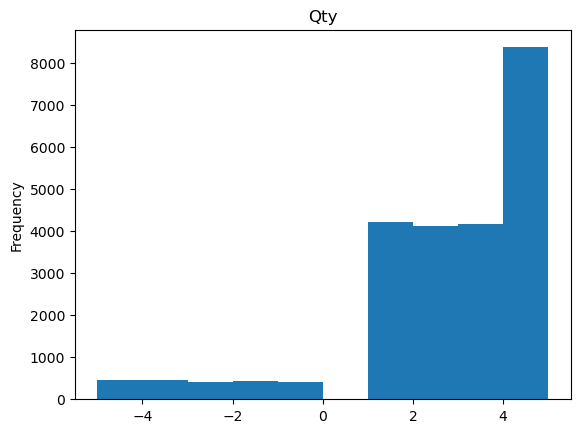

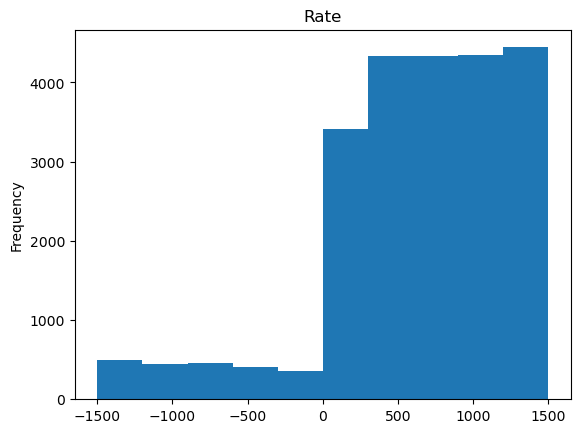

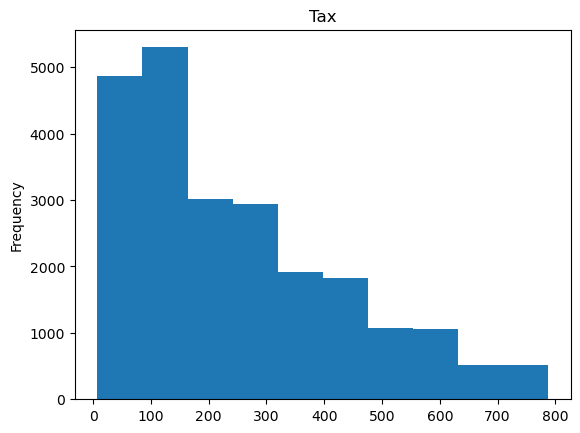

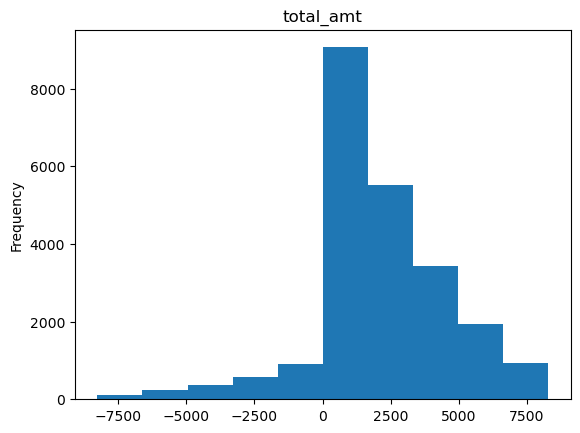

In [105]:
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

Bar chart of categorical variables

In [106]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [107]:
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


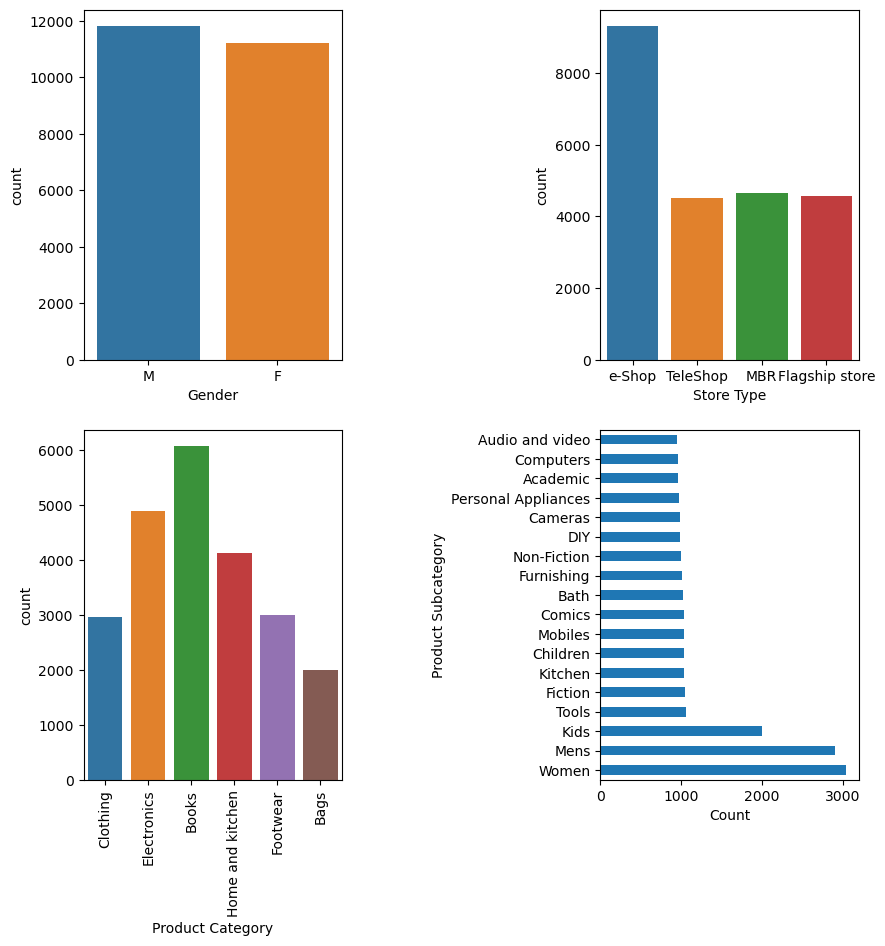

In [108]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
sns.countplot(data=category_customer, x='Gender', ax=ax1)

ax2 = fig.add_subplot(2, 2, 2)
sns.countplot(data=category_customer, x='Store_type', ax=ax2)
ax2.set_xlabel('Store Type')

ax3 = fig.add_subplot(2, 2, 3)
sns.countplot(data=category_customer, x='prod_cat', ax=ax3)
ax3.set_xlabel('Product Category')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

ax4 = fig.add_subplot(2, 2, 4)
category_customer['prod_subcat'].value_counts().plot(kind='barh', ax=ax4)
ax4.set_xlabel('Count')
ax4.set_ylabel('Product Subcategory')

plt.subplots_adjust(wspace=1)
plt.show()


 4. Calculate the following information using the merged dataset :

 a. Time period of the available transaction data

In [109]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,268885,1989-04-14,F,6.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,1992-11-24,M,9.0
23036,46821751538,269160,2011-01-25,10,5,5,941,494.025,5199.025,TeleShop,Books,Non-Fiction,269160,1972-01-24,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0


In [110]:
min_date = customer_final["tran_date"].min()
min_date

Timestamp('2011-01-25 00:00:00')

In [111]:
max_date = customer_final["tran_date"].max()
max_date

Timestamp('2014-02-28 00:00:00')

In [112]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


(b) Count of transactions where the total amount of transaction was negative

In [113]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [114]:
#count of transaction_ids where total_amt was negative
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


(5) Analyze which product categories are more popular among females vs male customers

In [115]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [116]:
#converting to pivot table for better view
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


(6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [117]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [118]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52


(7) Which store type sells the maximum products by value and by quantity?

In [119]:
customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False).head(1)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770


In [120]:
print('e-Shop store sell the maximum products by value and by quantity')

e-Shop store sell the maximum products by value and by quantity


(8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [121]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [122]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

(9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [123]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [124]:
male_earning = gender_group.loc["Electronics","M"]
print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5711351.62


(10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [125]:
#creating a new dataframe that does not contain transactions with negative values
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]
pos_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [126]:
# creating a dataframe that contains unique transactions 
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [127]:
# now finding the customers which have unique transactions greater than 10
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [128]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [129]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


(11) For all customers aged between 25-35, find out:

a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [130]:
# Getting Ages for customers from DOB to 1st Mar, 2014.
customer_final['DOB']=pd.to_datetime(customer_final['DOB'])
dateforage=pd.to_datetime('2014-3-1')
customer_final['Age']=((dateforage - customer_final['DOB']).dt.total_seconds()/(365.25*24*3600)).astype('int')

In [131]:
# Filtering by ages 25 to 35.
customer_final_25_35=customer_final.loc[(customer_final.Age > 25)&(customer_final.Age <35)]
# a. What was the total amount spent for “Electronics” and “Books” product categories?
customer_final_25_35_EB=customer_final_25_35.loc[(customer_final_25_35.prod_cat =='Electronics')|(customer_final_25_35.prod_cat =='Books')]
display(customer_final_25_35_EB.agg({'total_amt':'sum'}).reset_index())

,index,0
0,total_amt,9198336.03


(b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [132]:
filter = ((customer_final['tran_date'] >= '1st Jan, 2014')&(customer_final['tran_date'] <= '1st Mar, 2014'))
display(customer_final['total_amt'].loc[filter].sum())

2235642.63